# Método de Monte Carlo – Exemplos Introdutórios

Este notebook apresenta dois exemplos simples de aplicação do método de Monte Carlo:

1. Estimativa de uma integral definida via amostragem uniforme;
2. Cálculo de uma média térmica ponderada por uma distribuição de Boltzmann.

## Exemplo 1: Estimando a Integral $ \int_0^1 x^2 dx $

A função $f(x) = x^2$ será integrada no intervalo $[0,1]$ utilizando amostragem uniforme.
A integral pode ser estimada como:
$$
I \approx \frac{1}{N} \sum_{i=1}^{N} x_i^2
$$

onde os $x_i $ são amostras aleatórias uniformemente distribuídas em $[0,1]$.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000000
x = np.random.uniform(0, 1, N)
y = x**2
integral_estimate = np.mean(y)

print(f"Estimativa da integral de x^2 de 0 a 1 com N = {N}: {integral_estimate:.5f}")

Estimativa da integral de x^2 de 0 a 1 com N = 1000000: 0.33290


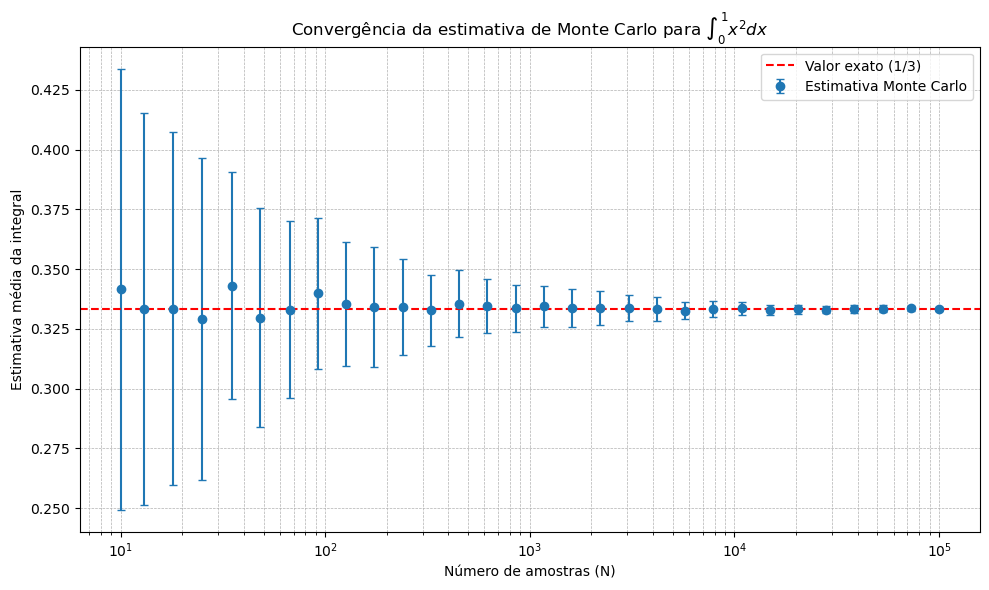

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Parâmetros para análise de convergência
max_N = 100000
steps = np.logspace(1, 5, num=30, dtype=int)  # Valores de N log-uniformemente espaçados
num_trials = 100  # Número de repetições por valor de N

mean_estimates = []
std_estimates = []

# Analisar cada valor de N
for N in steps:
    estimates = []
    for _ in range(num_trials):
        x = np.random.uniform(0, 1, N)
        y = x**2
        estimate = np.mean(y)
        estimates.append(estimate)
    mean_estimates.append(np.mean(estimates))
    std_estimates.append(np.std(estimates))

steps, mean_estimates, std_estimates


# Use estes arrays se já estiverem carregados no notebook:
# steps, mean_estimates, std_estimates

steps = np.array(steps)
mean_estimates = np.array(mean_estimates)
std_estimates = np.array(std_estimates)

plt.figure(figsize=(10, 6))
plt.errorbar(steps, mean_estimates, yerr=std_estimates, fmt='o', capsize=3, label='Estimativa Monte Carlo')
plt.axhline(1/3, color='red', linestyle='--', label='Valor exato (1/3)')
plt.xscale('log')
plt.xlabel('Número de amostras (N)')
plt.ylabel('Estimativa média da integral')
plt.title(r'Convergência da estimativa de Monte Carlo para $\int_0^1 x^2 dx$')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Exemplo 2: Média Térmica com Pesos de Boltzmann

Queremos calcular a média térmica:
$$
\langle x \rangle = \frac{\int_0^1 x e^{-\beta x} dx}{\int_0^1 e^{-\beta x} dx} 
$$

Usamos amostragem uniforme em $ x \in [0,1] $, e aplicamos pesos:
$$
w_i = e^{-\beta x_i} \quad \Rightarrow \quad \langle x \rangle \approx \frac{\sum x_i w_i}{\sum w_i}
$$

In [32]:
N = 100000
beta = 2.0
x = np.random.uniform(0, 1, N)
weights = np.exp(-beta * x)
thermal_avg = np.sum(x * weights) / np.sum(weights)

print(f"Média térmica estimada com beta = {beta}: {thermal_avg:.5f}")

Média térmica estimada com beta = 2.0: 0.34224
